# Flip 7 League Championship Tournament

This notebook runs a comprehensive league tournament with all 575 available strategies from our configuration file. Each strategy plays as a unique player across N games with random matchmaking.

## 1. Import Required Libraries

Import all necessary modules for running the championship and creating visualizations.

In [1]:
import sys
import os
import json
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# Add parent directory to path to import from src
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import our custom modules
from src.league_simulation import LeagueSimulation, LeaguePlayer
from src.league_visualizer import LeagueVisualizer

print("✅ All libraries imported successfully!")
print(f"Championship start time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All libraries imported successfully!
Championship start time: 2026-01-18 21:18:51


## 2. Tournament Configuration

Set up the championship parameters and initialize the league simulation.

In [2]:
# Tournament configuration
STRATEGY_CONFIG_FILE = '../config/strategy_configurations.json'
NUM_TURNS = 100
PLAYERS_PER_GAME = 5
TOURNAMENT_SEED = 42  # For reproducible results

print("🏆 FLIP 7 LEAGUE CHAMPIONSHIP SETUP")
print("=" * 50)
print(f"Configuration file: {STRATEGY_CONFIG_FILE}")
print(f"Tournament turns: {NUM_TURNS}")
print(f"Players per game: {PLAYERS_PER_GAME}")
print(f"Expected total games: {NUM_TURNS * (575 // PLAYERS_PER_GAME)} (575 players ÷ 5 = 115 games per turn)")
print(f"Games each player plays: {NUM_TURNS}")
print(f"Tournament seed: {TOURNAMENT_SEED}")

# Verify configuration file exists
if os.path.exists(STRATEGY_CONFIG_FILE):
    print(f"✅ Strategy configuration file found")
else:
    print(f"❌ Strategy configuration file not found: {STRATEGY_CONFIG_FILE}")

🏆 FLIP 7 LEAGUE CHAMPIONSHIP SETUP
Configuration file: ../config/strategy_configurations.json
Tournament turns: 100
Players per game: 5
Expected total games: 11500 (575 players ÷ 5 = 115 games per turn)
Games each player plays: 100
Tournament seed: 42
✅ Strategy configuration file found


## 3. Initialize League and Load Strategies

Create the league simulation and load all 575 strategies from the configuration file.

In [3]:
print("🔄 Loading strategies and creating players...")

# Create league simulation
league = LeagueSimulation(STRATEGY_CONFIG_FILE, seed=TOURNAMENT_SEED)

print(f"✅ League created successfully!")
print(f"📊 Players registered: {len(league.players)}")
print(f"📋 Strategies loaded: {len(league.strategies)}")

# Display first few strategies for verification
print(f"\n🎯 Sample strategies:")
for i, strategy in enumerate(league.strategies[:5]):
    print(f"  {i+1}. {strategy['name']}")
print(f"  ... and {len(league.strategies) - 5} more strategies")

🔄 Loading strategies and creating players...
Loaded strategies: single=25, two_class=175, three_class=375, total=575
Created 575 players with unique strategies
✅ League created successfully!
📊 Players registered: 575
📋 Strategies loaded: 575

🎯 Sample strategies:
  1. Single: Score | Conservative Score
  2. Single: Score | Moderate Score
  3. Single: Score | Aggressive Score
  4. Single: Score | High Score
  5. Single: Score | Very Aggressive Score
  ... and 570 more strategies


## 4. Run Tournament Games

Execute all tournament turns with turn-based structure. Each turn randomly groups all 575 players into games of 5.

In [4]:
print("🎮 STARTING CHAMPIONSHIP TOURNAMENT")
print("=" * 60)

# Run the complete league tournament with turn-based structure
leaderboard = league.run_league(num_turns=NUM_TURNS, players_per_game=PLAYERS_PER_GAME)

print(f"\n🎉 TOURNAMENT COMPLETE!")
print(f"Total turns played: {NUM_TURNS}")
print(f"Total games played: {len(league.game_results)}")
print(f"Each player participated in: {NUM_TURNS} games")

# Quick summary of champion
champion = leaderboard['rankings'][0]
print(f"\n🏆 CHAMPION: {champion['name']}")
print(f"📈 Strategy: {champion['strategy']}")

print(f"🎯 Performance: {champion['wins']} wins ({champion['win_percentage']:.1f}% win rate)")
print(f"⭐ Average Score: {champion['average_score']:.1f}")

🎮 STARTING CHAMPIONSHIP TOURNAMENT
🏆 Starting League Simulation
Players: 575
Turns: 100
Players per game: 5
Games per turn: 115
Total games: 11500
Random seed: 42

🔄 TURN 1/100
------------------------------
  Game 1: Group 1

🎮 Game 1: ['TwoClass:_Hand+', 'ThreeClass:_Sco', 'TwoClass:_Score', 'ThreeClass:_Sco', 'TwoClass:_Score']
Winner: ThreeClass:_Score+Ha in 11 rounds
  Game 2: Group 2
  Game 3: Group 3
  Game 4: Group 4
  Game 5: Group 5
  Game 6: Group 6
  Game 7: Group 7
  Game 8: Group 8
  Game 9: Group 9
  Game 10: Group 10
  Game 11: Group 11
  Game 12: Group 12
  Game 13: Group 13
  Game 14: Group 14
  Game 15: Group 15
  Game 16: Group 16
  Game 17: Group 17
  Game 18: Group 18
  Game 19: Group 19
  Game 20: Group 20
  Game 21: Group 21
  Game 22: Group 22
  Game 23: Group 23
  Game 24: Group 24
  Game 25: Group 25
  Game 26: Group 26
  Game 27: Group 27
  Game 28: Group 28
  Game 29: Group 29
  Game 30: Group 30
  Game 31: Group 31
  Game 32: Group 32
  Game 33: Group 33
 

## 5. Detailed Results Analysis

Display comprehensive statistics and detailed performance analysis.

In [5]:
# Print detailed statistics
league.print_detailed_stats(leaderboard)

# Export results for further analysis
os.makedirs('../results', exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_filename = f"../results/championship_results_{timestamp}.json"
exported_file = league.export_results(results_filename)

print(f"💾 Results exported to: {exported_file}")


📊 DETAILED LEAGUE STATISTICS
Total games played: 11500
Total rounds played: 123781
Average rounds per game: 10.8

🎯 Top 10 Strategy Performance (by win rate):
------------------------------------------------------------
 1. ThreeClass: Score+Hand+High | High Score + Aggressive Hand Size + Strict High Value_3  52.0% (52/100)
 2. ThreeClass: Score+Hand+High | Very Aggressive Score + Conservative Hand Size + Conservative High Value_3  48.0% (48/100)
 3. ThreeClass: Score+Hand+High | Very Aggressive Score + Aggressive Hand Size + Very Aggressive High Value_2  48.0% (48/100)
 4. ThreeClass: Score+Hand+High | Very Aggressive Score + Very Aggressive Hand Size + Aggressive High Value_2  48.0% (48/100)
 5. TwoClass: Score+High | Very Aggressive Score + Strict High Value_3  47.0% (47/100)
 6. TwoClass: Hand+High | Conservative Hand Size + Strict High Value_3  47.0% (47/100)
 7. ThreeClass: Score+Hand+High | High Score + Very Aggressive Hand Size + Conservative High Value_3  47.0% (47/100)
 8. T

## 6. Create Performance DataFrame

Convert results to a pandas DataFrame for easier analysis and manipulation.

In [6]:
# Create DataFrame from leaderboard
df_results = pd.DataFrame(leaderboard['rankings'])

# Display basic statistics
print("📊 CHAMPIONSHIP STATISTICS")
print("=" * 40)
print(f"Total participants: {len(df_results)}")
print(f"Games per player: {NUM_TURNS}")
print(f"Total tournament games: {len(league.game_results)}")
print(f"Average wins per player: {df_results['wins'].mean():.2f}")
print(f"Standard deviation of wins: {df_results['wins'].std():.2f}")
print(f"Most wins: {df_results['wins'].max()}")
print(f"Fewest wins: {df_results['wins'].min()}")

print(f"\n📈 Score Statistics:")
print(f"Average score per game: {df_results['average_score'].mean():.2f}")
print(f"Highest average score: {df_results['average_score'].max():.2f}")
print(f"Lowest average score: {df_results['average_score'].min():.2f}")

# Display top 10 performers

print(f"\n🏆 TOP 10 PERFORMERS:")
print(df_results[['rank', 'name', 'wins', 'win_percentage', 'average_score', 'strategy']].head(10).to_string(index=False))

📊 CHAMPIONSHIP STATISTICS
Total participants: 575
Games per player: 100
Total tournament games: 11500
Average wins per player: 20.00
Standard deviation of wins: 15.36
Most wins: 52
Fewest wins: 0

📈 Score Statistics:
Average score per game: 158.88
Highest average score: 187.67
Lowest average score: 113.19

🏆 TOP 10 PERFORMERS:
 rank                                                                                                                 name  wins  win_percentage  average_score                                                                                                  strategy
    1                     Player_469_ThreeClass:_Score+Hand+High_|_High_Score_+_Aggressive_Hand_Size_+_Strict_High_Value_3    52            52.0         187.67                     ThreeClass: Score+Hand+High | High Score + Aggressive Hand Size + Strict High Value_3
    2  Player_511_ThreeClass:_Score+Hand+High_|_Very_Aggressive_Score_+_Conservative_Hand_Size_+_Conservative_High_Value_3    48           

## 7. Visualization: Win Distribution

Create a bar chart showing the distribution of wins across all players.

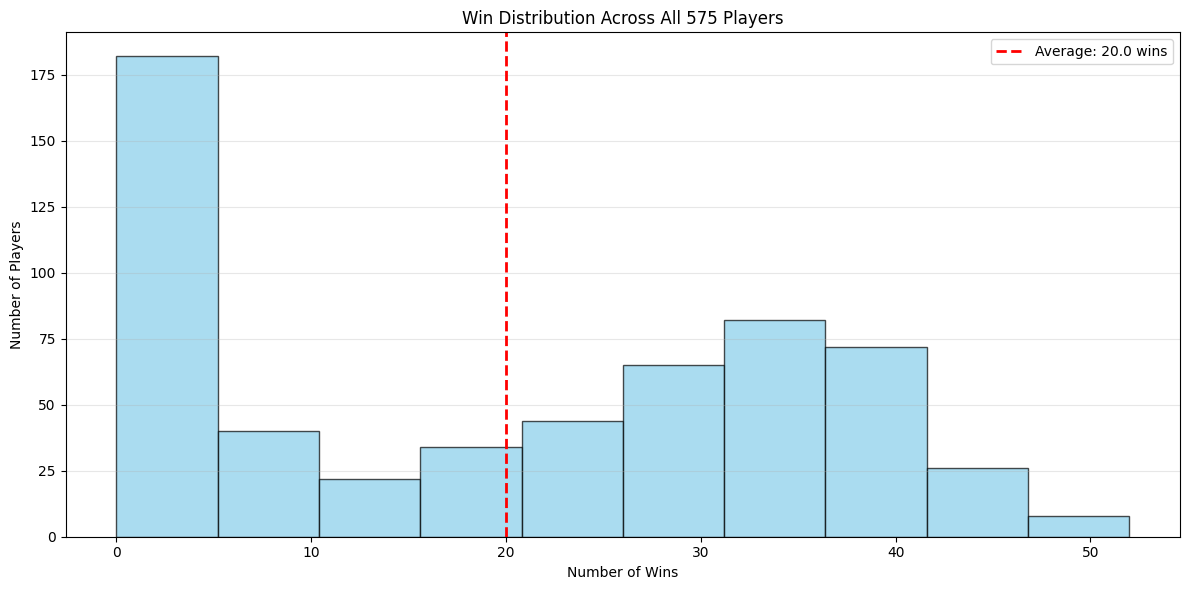

Win distribution: Champion with 52 wins vs average of 20.0
Win range: 0 to 52 wins


In [7]:
plt.figure(figsize=(12, 6))

# Extract data for plotting
wins = df_results['wins'].values

# Create histogram
plt.hist(wins, bins=10, alpha=0.7, color='skyblue', edgecolor='black')

plt.xlabel('Number of Wins')
plt.ylabel('Number of Players')
plt.title(f'Win Distribution Across All {len(wins)} Players')
plt.grid(True, alpha=0.3, axis='y')

# Add average line
avg_wins = wins.mean()
plt.axvline(x=avg_wins, color='red', linestyle='--', linewidth=2, 
           label=f'Average: {avg_wins:.1f} wins')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Win distribution: Champion with {wins.max()} wins vs average of {avg_wins:.1f}")
print(f"Win range: {wins.min()} to {wins.max()} wins")

## 8. Visualization: Strategy Performance Analysis

Analyze which strategy types perform best and show performance correlation.

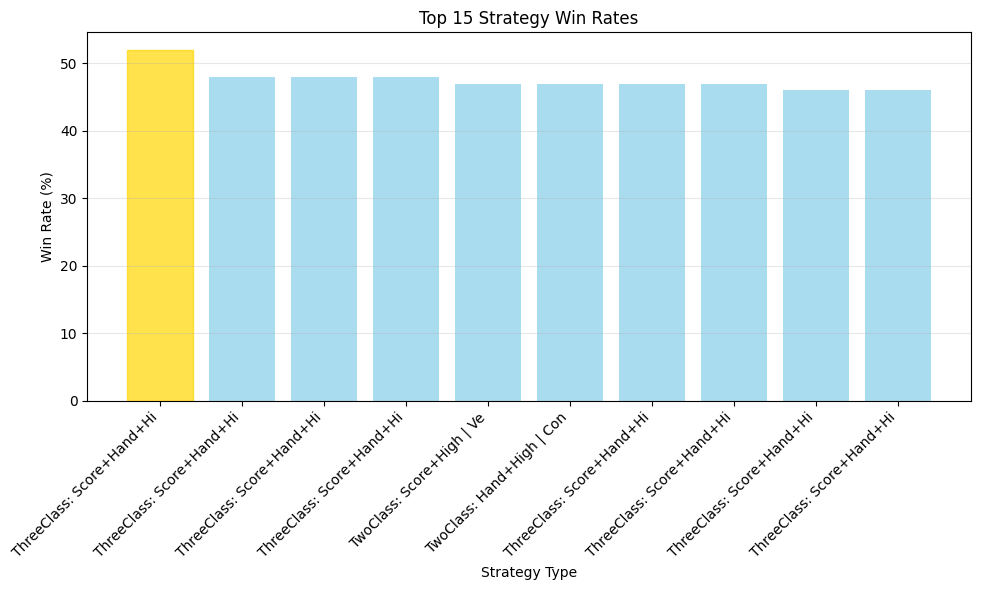

🎯 Best performing strategy: ThreeClass: Score+Hand+Hi (52.0% win rate)


In [8]:
plt.figure(figsize=(10, 6))

# Strategy win rates (top 15)
strategy_data = leaderboard['summary_stats']['strategy_performance'][:15]
strategies = [s['strategy'][:25] for s in strategy_data]
win_rates = [s['win_rate'] for s in strategy_data]

bars = plt.bar(range(len(strategies)), win_rates, alpha=0.7, color='skyblue')
plt.xlabel('Strategy Type')
plt.ylabel('Win Rate (%)')
plt.title('Top 15 Strategy Win Rates')
plt.xticks(range(len(strategies)), strategies, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Highlight top performer
max_idx = win_rates.index(max(win_rates))
bars[max_idx].set_color('gold')

plt.tight_layout()
plt.show()

print(f"🎯 Best performing strategy: {strategies[max_idx]} ({max(win_rates):.1f}% win rate)")

## 9. Game Statistics Analysis

Analyze the distribution of scores, game lengths, and winner frequencies across all games.

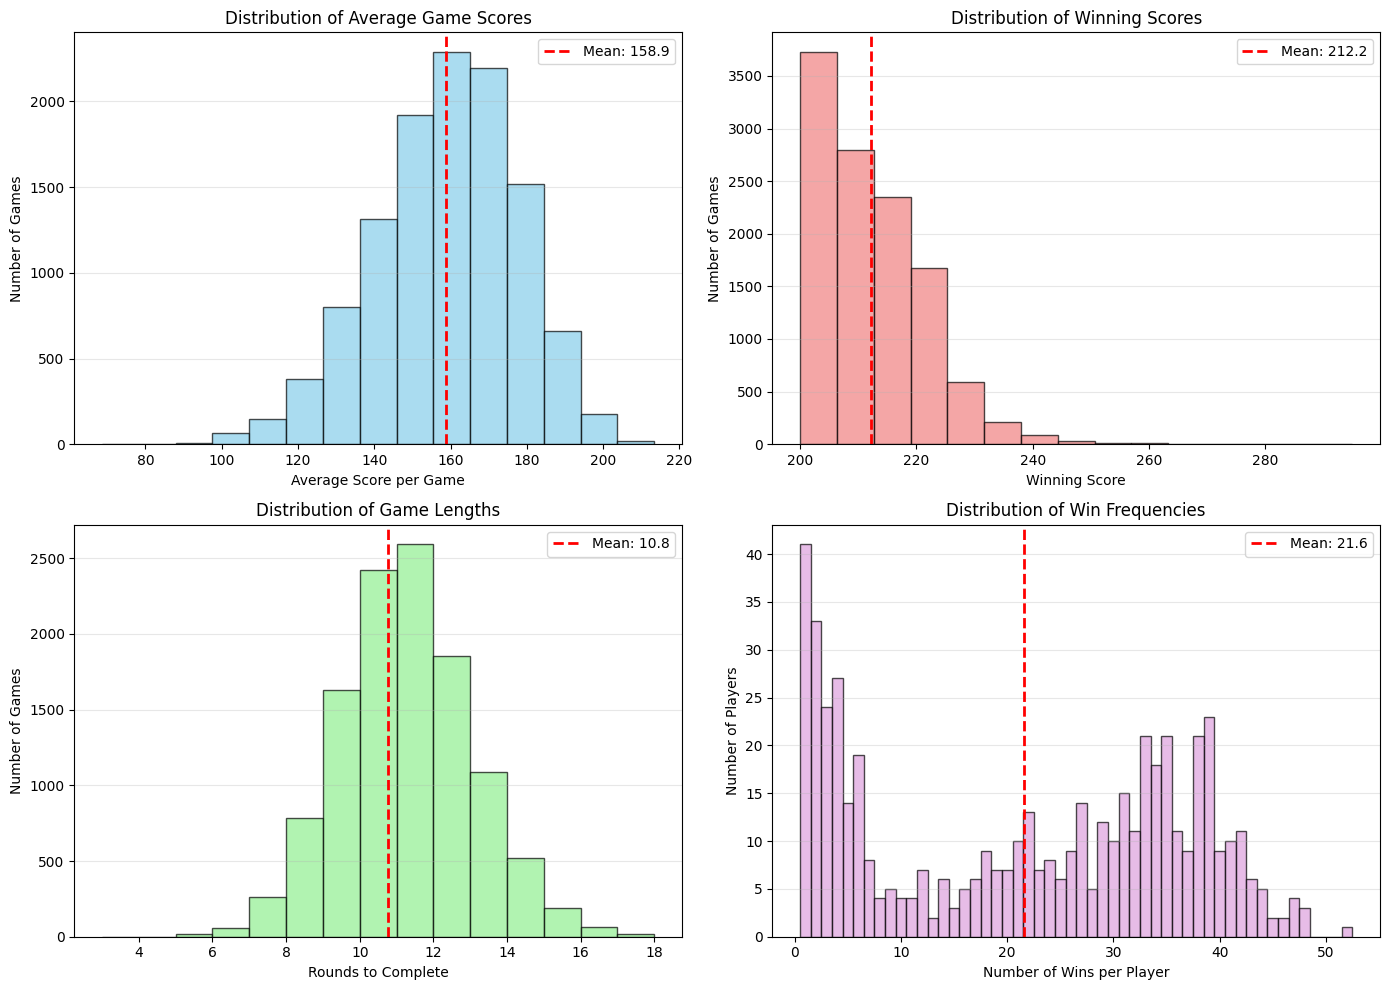

   Most wins by one player: 52
Game Statistics Summary:
   Average wins per winner: 21.6

Scores:
   Unique winners: 532 different players won games
   Average game score: 158.9 ± 18.8

Winners:
   Average winning score: 212.2 ± 9.2
   Longest game: 18 rounds
   Score range: 68.6 - 213.4
   Shortest game: 3 rounds

Game Length:
   Average rounds per game: 10.8 ± 1.8


In [9]:
# Extract game data
avg_scores = []
winning_scores = []
rounds_played = []
winners = []

for game in league.game_results:
    scores = list(game['final_scores'].values())
    avg_scores.append(np.mean(scores))
    winning_scores.append(max(scores))
    rounds_played.append(game['rounds_played'])
    winners.append(game['winner'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Average scores distribution
ax1.hist(avg_scores, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(x=np.mean(avg_scores), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {np.mean(avg_scores):.1f}')
ax1.set_xlabel('Average Score per Game')
ax1.set_ylabel('Number of Games')
ax1.set_title('Distribution of Average Game Scores')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Winning scores distribution
ax2.hist(winning_scores, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(x=np.mean(winning_scores), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(winning_scores):.1f}')
ax2.set_xlabel('Winning Score')
ax2.set_ylabel('Number of Games')
ax2.set_title('Distribution of Winning Scores')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Game length distribution
ax3.hist(rounds_played, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(x=np.mean(rounds_played), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(rounds_played):.1f}')
ax3.set_xlabel('Rounds to Complete')
ax3.set_ylabel('Number of Games')
ax3.set_title('Distribution of Game Lengths')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Winner frequency distribution
winner_counts = {}
for winner in winners:
    winner_counts[winner] = winner_counts.get(winner, 0) + 1

win_frequencies = list(winner_counts.values())
ax4.hist(win_frequencies, bins=range(1, max(win_frequencies) + 2), alpha=0.7, 
         color='plum', edgecolor='black', align='left')
ax4.axvline(x=np.mean(win_frequencies), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(win_frequencies):.1f}')
ax4.set_xlabel('Number of Wins per Player')
ax4.set_ylabel('Number of Players')
ax4.set_title('Distribution of Win Frequencies')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"   Most wins by one player: {max(win_frequencies)}")
print(f"Game Statistics Summary:")
print(f"   Average wins per winner: {np.mean(win_frequencies):.1f}")
print(f"\nScores:")
print(f"   Unique winners: {len(winner_counts)} different players won games")
print(f"   Average game score: {np.mean(avg_scores):.1f} ± {np.std(avg_scores):.1f}")
print(f"\nWinners:")
print(f"   Average winning score: {np.mean(winning_scores):.1f} ± {np.std(winning_scores):.1f}")
print(f"   Longest game: {max(rounds_played)} rounds")
print(f"   Score range: {min(avg_scores):.1f} - {max(avg_scores):.1f}")
print(f"   Shortest game: {min(rounds_played)} rounds")
print(f"\nGame Length:")
print(f"   Average rounds per game: {np.mean(rounds_played):.1f} ± {np.std(rounds_played):.1f}")

## 11. Final Championship Summary

Display the complete championship summary with key insights and conclusions.

In [10]:
print("🏆 FLIP 7 LEAGUE CHAMPIONSHIP - FINAL SUMMARY")
print("=" * 60)

# Tournament overview
summary_stats = leaderboard['summary_stats']
print(f"📊 Tournament Statistics:")
print(f"   • Total turns played: {summary_stats['total_games'] // 7}")
print(f"   • Total games played: {summary_stats['total_games']}")
print(f"   • Total rounds played: {summary_stats['total_rounds']}")
print(f"   • Average rounds per game: {summary_stats['average_rounds_per_game']:.1f}")
print(f"   • Games per player: 100 (guaranteed equal participation)")

# Champion details
champion = leaderboard['rankings'][0]
runner_up = leaderboard['rankings'][1]
third_place = leaderboard['rankings'][2]

print(f"\n🥇 PODIUM FINISHERS:")
print(f"   1st Place: {champion['name'].split('_', 2)[-1]}")
print(f"      Strategy: {champion['strategy']}")
print(f"      Record: {champion['wins']}/{champion['games_played']} wins ({champion['win_percentage']:.1f}%)")
print(f"      Avg Score: {champion['average_score']:.1f}")

print(f"   2nd Place: {runner_up['name'].split('_', 2)[-1]}")
print(f"      Strategy: {runner_up['strategy']}")
print(f"      Record: {runner_up['wins']}/{runner_up['games_played']} wins ({runner_up['win_percentage']:.1f}%)")

print(f"   3rd Place: {third_place['name'].split('_', 2)[-1]}")
print(f"      Strategy: {third_place['strategy']}")
print(f"      Record: {third_place['wins']}/{third_place['games_played']} wins ({third_place['win_percentage']:.1f}%)")

# Strategy parameters for podium finishers
print(f"\n📋 STRATEGY PARAMETERS:")

def get_player_config(player_name):
    for player in league.players:
        if player.name == player_name:
            return player.strategy_config
    return None

for i, finisher in enumerate([champion, runner_up, third_place], 1):
    config = get_player_config(finisher['name'])
    if config:
        print(f"\n   {i}. {finisher['name'].split('_', 2)[-1]}")
        print(f"      use_score_condition: {config.get('use_score_condition', False)}")
        if config.get('use_score_condition'):
            print(f"      score_threshold: {config.get('score_threshold', 'N/A')}")
        print(f"      use_hand_size_condition: {config.get('use_hand_size_condition', False)}")
        if config.get('use_hand_size_condition'):
            print(f"      hand_size_limit: {config.get('hand_size_limit', 'N/A')}")
        print(f"      use_high_value_condition: {config.get('use_high_value_condition', False)}")
        if config.get('use_high_value_condition'):
            print(f"      high_value_threshold: {config.get('high_value_threshold', 'N/A')}")
            print(f"      high_value_limit: {config.get('high_value_limit', 'N/A')}")
        print(f"      high_risk_probability: {config.get('high_risk_probability', 0.9)}")
        print(f"      low_risk_probability: {config.get('low_risk_probability', 0.1)}")

# Performance spread
win_spread = df_results['wins'].max() - df_results['wins'].min()
print(f"   • Performance spread: {win_spread} wins between best and worst performers")
print(f"   • Tournament competitiveness: {'High' if win_spread <= 3 else 'Moderate' if win_spread <= 5 else 'Variable'}")

print(f"\n💾 Results saved to: {exported_file}")
print(f"📅 Championship completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("🎉 Thank you for participating in the Flip 7 League Championship!")

🏆 FLIP 7 LEAGUE CHAMPIONSHIP - FINAL SUMMARY
📊 Tournament Statistics:
   • Total turns played: 1642
   • Total games played: 11500
   • Total rounds played: 123781
   • Average rounds per game: 10.8
   • Games per player: 100 (guaranteed equal participation)

🥇 PODIUM FINISHERS:
   1st Place: ThreeClass:_Score+Hand+High_|_High_Score_+_Aggressive_Hand_Size_+_Strict_High_Value_3
      Strategy: ThreeClass: Score+Hand+High | High Score + Aggressive Hand Size + Strict High Value_3
      Record: 52/100 wins (52.0%)
      Avg Score: 187.7
   2nd Place: ThreeClass:_Score+Hand+High_|_Very_Aggressive_Score_+_Conservative_Hand_Size_+_Conservative_High_Value_3
      Strategy: ThreeClass: Score+Hand+High | Very Aggressive Score + Conservative Hand Size + Conservative High Value_3
      Record: 48/100 wins (48.0%)
   3rd Place: ThreeClass:_Score+Hand+High_|_Very_Aggressive_Score_+_Very_Aggressive_Hand_Size_+_Aggressive_High_Value_2
      Strategy: ThreeClass: Score+Hand+High | Very Aggressive Score